In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2

In [75]:
root_dir

'C:\\Users\\gaura\\Deep Learning & AI'

In [76]:
train=pd.read_csv("train.csv")
test_csv = pd.read_csv("test.csv")

In [77]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [78]:
train.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [79]:
# setting path for images
train_path = root_dir + '/Train/'
test_path = root_dir + '/Test/'

In [80]:
train_path

'C:\\Users\\gaura\\Deep Learning & AI/Train/'

In [81]:
from PIL import Image
from scipy.misc.pilutil import imread

In [104]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join(train_path, img_name))

print( train.Class[i])

YOUNG


C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


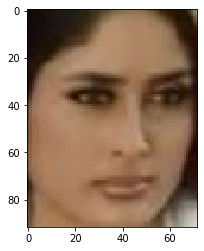

In [105]:
plt.imshow(img)

In our data there are images of different sizes, shapes with different pixles, so to handle these variations we have to simply resizing the image.

In [88]:
from scipy.misc import imresize

In [112]:
temp = []
for img_name in train.ID:
    img_path = os.path.join(train_path, img_name)
    img = imread(img_path)
    img = imresize(img, (64,64))
    img = img.astype('float32') 
    temp.append(img)

train_x = np.stack(temp)

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [113]:
train_x.shape

(19906, 64, 64, 3)

In [114]:
## Scaling the images for test
temp = []
for img_name in test.ID:
    img_path = os.path.join(test_path, img_name)
    img = imread(img_path)
    img = imresize(img, (64,64))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [115]:
test_x.shape

(6636, 64, 64, 3)

In [116]:
# Scaling the images 
train_x = train_x / 255
test_x = test_x / 255

In [117]:
train_x 

array([[[[0.2       , 0.18431373, 0.1882353 ],
         [0.18431373, 0.1764706 , 0.18039216],
         [0.17254902, 0.16470589, 0.16862746],
         ...,
         [0.01568628, 0.04313726, 0.01176471],
         [0.02745098, 0.05490196, 0.02352941],
         [0.02745098, 0.05490196, 0.02352941]],

        [[0.2       , 0.1882353 , 0.19215687],
         [0.18431373, 0.1764706 , 0.18039216],
         [0.17254902, 0.16470589, 0.16862746],
         ...,
         [0.03529412, 0.0627451 , 0.03137255],
         [0.04705882, 0.07450981, 0.04313726],
         [0.04313726, 0.07058824, 0.03921569]],

        [[0.21960784, 0.21176471, 0.21568628],
         [0.20784314, 0.2       , 0.20392157],
         [0.19607843, 0.1882353 , 0.19215687],
         ...,
         [0.07058824, 0.09411765, 0.0627451 ],
         [0.07843138, 0.09803922, 0.07058824],
         [0.07450981, 0.09411765, 0.06666667]],

        ...,

        [[0.48235294, 0.5921569 , 0.54509807],
         [0.44705883, 0.5529412 , 0.50980395]

In [118]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [119]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [120]:
train_y.shape

(19906, 3)

In [121]:
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential


#### Building a model

In [111]:
model = Sequential()

model.add(Conv2D(50, (5, 5), input_shape = (64, 64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(100, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(100, (5, 5), activation = 'relu'))

model.add(Flatten())


model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 3, activation = 'sigmoid'))

# Compile model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 50)        3800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 100)       125100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 100)         250100    
_________________________________________________________________
flatten_1 (Flatten)          (None, 8100)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [122]:
epochs=30
batch_size = 512
model.fit( train_x, train_y, nb_epoch=epochs, batch_size=batch_size)

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/30
19906/19906 [==============================] - 118s 6ms/step - loss: 0.9453 - accuracy: 0.5318
Epoch 2/30
19906/19906 [==============================] - 133s 7ms/step - loss: 0.8674 - accuracy: 0.5428
Epoch 3/30
19906/19906 [==============================] - 132s 7ms/step - loss: 0.8482 - accuracy: 0.5507
Epoch 4/30
19906/19906 [==============================] - 134s 7ms/step - loss: 0.7732 - accuracy: 0.6531
Epoch 5/30
19906/19906 [==============================] - 134s 7ms/step - loss: 0.7107 - accuracy: 0.6829
Epoch 6/30
19906/19906 [==============================] - 140s 7ms/step - loss: 0.6824 - accuracy: 0.6952
Epoch 7/30
19906/19906 [==============================] - 136s 7ms/step - loss: 0.6496 - accuracy: 0.7100
Epoch 8/30
19906/19906 [==============================] - 138s 7ms/step - loss: 0.6054 - accuracy: 0.7348
Epoch 9/30
19906/19906 [==============================] - 146s 7ms/step - loss: 0.5799 - accuracy: 0.7499
Epoch 10/30
19906/19906 [=====================

Making predictions on test set

In [127]:
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis= 1)

In [128]:
# Converting predicted category numbers to predicted labels
unique_labels = np.unique(train['Class'].tolist())
pred_labels = unique_labels[predictions]

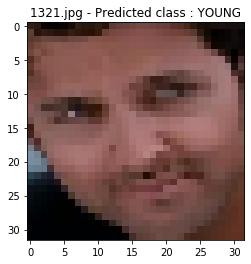

In [137]:
## Let's see what our classifier predicts on test images
# Random predictions
i = np.random.choice(np.arange(len(test_data)))
plt.title('{} - Predicted class : {}'.format(test['ID'].values[i], pred_labels[i]))
plt.imshow(test_data[i])